In [2]:
import seaborn as sns
import pandas as pd
df_mpg = sns.load_dataset("mpg")
df_mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [3]:
df_mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [4]:
df_mpg.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [5]:
df_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [6]:
df_mpg.shape

(398, 9)

# Calculating Median to input in the missing data in horsepower

In [7]:
sorted_horsepower = sorted(df_mpg["horsepower"].dropna())
n = len(sorted_horsepower)
if n % 2 == 0:
    median = (sorted_horsepower[n // 2 - 1] + sorted_horsepower[n // 2]) // 2
else:
    median = sorted_horsepower[n // 2]
df_mpg = df_mpg.fillna(median)
df_mpg.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [8]:
df_statistic_columns = df_mpg.loc[:, ["mpg","cylinders" , "displacement" , "horsepower" , "weight" , "acceleration"]]
df_statistic_columns

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504,12.0
1,15.0,8,350.0,165.0,3693,11.5
2,18.0,8,318.0,150.0,3436,11.0
3,16.0,8,304.0,150.0,3433,12.0
4,17.0,8,302.0,140.0,3449,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6
394,44.0,4,97.0,52.0,2130,24.6
395,32.0,4,135.0,84.0,2295,11.6
396,28.0,4,120.0,79.0,2625,18.6


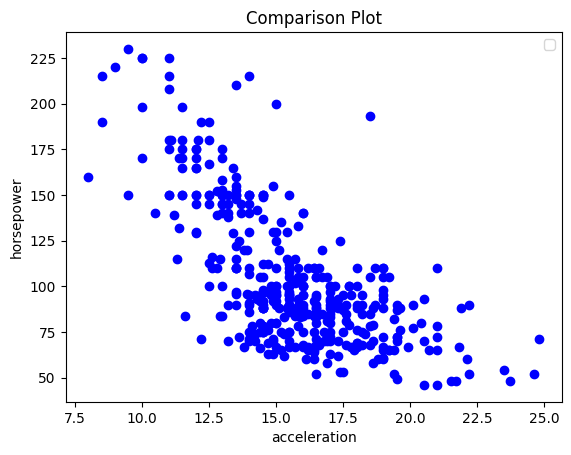

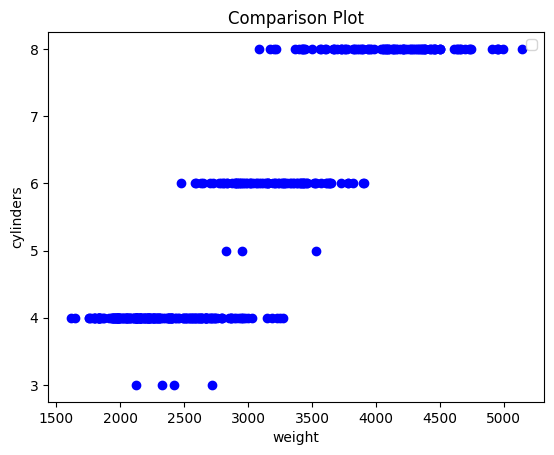

In [9]:
from cProfile import label
from turtle import color
import matplotlib.pyplot as plt
def Plotgraph(df , x_col , y_col):
    plt.scatter(df_statistic_columns[x_col], df_statistic_columns[y_col], marker= 'o' , color = 'blue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Comparison Plot')
    plt.legend("")
    plt.show()

Plotgraph(df_statistic_columns, "acceleration" , "horsepower")
Plotgraph(df_statistic_columns, "weight" , "cylinders")
  

In [10]:
X , y = df_statistic_columns.drop("mpg" , axis = "columns" ), df_statistic_columns["mpg"]
X

,cylinders,displacement,horsepower,weight,acceleration
0,8,307.0,130.0,3504,12.0
1,8,350.0,165.0,3693,11.5
2,8,318.0,150.0,3436,11.0
3,8,304.0,150.0,3433,12.0
4,8,302.0,140.0,3449,10.5
...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6
394,4,97.0,52.0,2130,24.6
395,4,135.0,84.0,2295,11.6
396,4,120.0,79.0,2625,18.6


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train , y_test = train_test_split(X, y , test_size = 0.2 , random_state= 42)
print(f"{X_train.shape =}")
print(f"{y_train.shape =}")
print(f"{X_test.shape =}")
print(f"{y_test.shape =}")

X_train.shape =(318, 5)
y_train.shape =(318,)
X_test.shape =(80, 5)
y_test.shape =(80,)


In [21]:
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def evaluate(X_train, X_test, y_train, y_test, model_type='linear_regression', degree = 1,use_scaled_data=False):
    if model_type == 'linear_regression':
        model = LinearRegression()
    elif model_type == 'sgd_regression':
        model = SGDRegressor()
    elif model_type == 'polynomial_regression':
        model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    else:
        raise ValueError("Invalid model_type. Supported values are 'linear_regression', 'sgd_regression', 'polynomial_regression'.")
    
    if use_scaled_data:
        model = make_pipeline(StandardScaler(), model)
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    return mae, mse, rmse


mae, mse, rmse = evaluate(X_train, X_test, y_train, y_test, model_type='linear_regression',use_scaled_data=True)
print("Linear Regression (SVD) with scaled data:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)


Linear Regression (SVD) with scaled data:
Mean Absolute Error: 3.1250662013509625
Mean Squared Error: 14.716610997341487
Root Mean Squared Error: 3.836223533286543


In [34]:
mae, mse, rmse = evaluate(X_train, X_test, y_train, y_test, model_type='sgd_regression', use_scaled_data=True)
print("Linear Regression (SGD) with scaled data:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Linear Regression (SGD) with scaled data:
Mean Absolute Error: 3.10952045434179
Mean Squared Error: 14.757069890449177
Root Mean Squared Error: 3.841493185006213


In [33]:

mae, mse, rmse = evaluate(X_train, X_test, y_train, y_test, model_type='polynomial_regression',degree = 1,use_scaled_data=True)
print("Polynomial_regression with first degree with scaled data:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Polynomial_regression with first degree with scaled data:
Mean Absolute Error: 3.125066201350963
Mean Squared Error: 14.716610997341487
Root Mean Squared Error: 3.836223533286543


In [36]:
mae, mse, rmse = evaluate(X_train, X_test, y_train, y_test, model_type='polynomial_regression',degree = 2,use_scaled_data=True)
print("Polynomial_regression with second degree with scaled data:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Polynomial_regression with second degree with scaled data:
Mean Absolute Error: 2.6388349834126075
Mean Squared Error: 11.727202954678072
Root Mean Squared Error: 3.424500394901141


In [37]:
mae, mse, rmse = evaluate(X_train, X_test, y_train, y_test, model_type='polynomial_regression',degree = 3,use_scaled_data=True)
print("Polynomial_regression with third degree with scaled data:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Polynomial_regression with third degree with scaled data:
Mean Absolute Error: 3.2496508789062504
Mean Squared Error: 27.385330896854406
Root Mean Squared Error: 5.233099549679368


In [38]:
from operator import index
import pandas as pd

df_statistics = pd.DataFrame({
    'MAE': [3.1250662013509625, 3.10952045434179, 3.125066201350963, 2.6388349834126075, 3.2496508789062504], 
    'MSE': [14.716610997341487, 14.757069890449177, 14.716610997341487, 11.727202954678072, 27.385330896854406],
    'Model': ["Linear Regression (SVD)", "Linear Regression (SGD)", "Polynomial Regression (Degree 1)", "Polynomial Regression (Degree 2)", "Polynomial Regression (Degree 3)"]
})
df_statistics

,MAE,MSE,Model
0,3.125066,14.716611,Linear Regression (SVD)
1,3.109520,14.757070,Linear Regression (SGD)
2,3.125066,14.716611,Polynomial Regression (Degree 1)
3,2.638835,11.727203,Polynomial Regression (Degree 2)
4,3.249651,27.385331,Polynomial Regression (Degree 3)
